# Population Dynamics with SciPy: Examples and Assignments

We will work with two models of population dynamics, fisheries and disease spreading model (SIR).


## 1. Fisheries dynamics

Models of fisheries have been developed to assess the impact of fish harvesting to the fish population dynamics (stock assessment).
The simplest model considers how the fish population size changes over time owing to births (assuming a fixed growth rate $r$ per individual, and a density dependence factor $(K-N)/N$, i.e., when the population size $N$ is closer to the carrying capacity $K$, the population growth rate is smaller), and to the harvest pressure ($H$), which is assumed to be constant over time.

The simplest model is described by the following differential quation: 

$\frac{dN}{dt}=rN\frac{K-N}{K}-H$,

where 
- $N$ denotes the population size
- $r$ is the growth per individual; $r*N$ is the total production rate without density dependence, 
- the ratio $(K-N)/N$ is a density dependence factor that modifies the total growth rate as a function of $N$
- $K$ is the carrying capacity
- $H$ is the harvest quota per unit time (i.e., the number of fish harvested per unit time).


The steady-states $N_\infty$ are obtained by setting $\frac{dN}{dt}=0$, yielding the following second-order polynomial equation:

$N_\infty=\frac{K}{2}\left(1\pm\sqrt{1-\frac{4H}{rK}}\right)$.

We will use odeint to solve this model assuming the following parameter values $r=1$, $K=10$, $H=2$. 

We will first have a look at the effect of the initial population size: for this, we will solve the model for different values of $N(0)$, specifically for 10 values of $N(0)$ within the range from 0 to $K+1$. 

Then, we will plot the different cases together, and visualise the behaviour of the system in comparison to the equilibrium solutions (i.e., the steady states $N_\infty$).

In [17]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # this will make the plots look professional, as opposed to the god-awful default

In [18]:
#We will start by defining the functions we need, and we'll also include the fixed points for visualisation

# equilibrium solutions
def fixed_pts(r,K,H):
    return (K/2*(1-np.sqrt(1-4*H/r/K)),K/2*(1+np.sqrt(1-4*H/r/K)))

# define and initialize variables
r=1
K=10.
H=2.

# Let's evaluate N as a function of time (at ntime=50 time points within a predefined range) 
# and for ncases=10 different values of the initial population size N0.
# We will have the result in the form N[ntime,ncases]

tmax = 20  
t = np.linspace(0,tmax,50)
nt = len(t)
N0vec = np.linspace(0,K+1,10) 
nd = len(N0vec)
N = np.zeros((nt,nd)) # define array 


def population_size(tmax,r,K,H):

    # compute dN/dt
    def delta_N(y,t,r,K,H):
        if y<0.:
            return np.nan
        elif y>K:
            return r*y*(K-y)/K-H
        else:
            return r*y*(K-y)/K-H

    # solve equation for different initial values
    for k in range(nd):  # loop over initial conditions
        y = odeint(delta_N, N0vec[k], t, args=(r,K,H)) # invoke ODE solver
        N[:,k] = y.flatten() # store result in an array
    
    return N

# compute and plot population size in figure axes ax for case r, K, H
def plot_population_size(ax,tmax,r,K,H):
    
    N = population_size(tmax,r,K,H)
    
    from cycler import cycler
    colors = [plt.cm.inferno(s) for s in np.linspace(0, 1, nd)]
    ax.set_prop_cycle(cycler('color', colors))
    ax.plot(t,N)    
    ax.hlines(fixed_pts(r,K,H),0,t[-1],linestyle='dashed',zorder=50)
    ax.set_title(f'Case K={K}, H={H}, r={r}')
    ax.set_xlabel('time')
    ax.set_ylabel('population size')  
    
    
#print(N0vec)

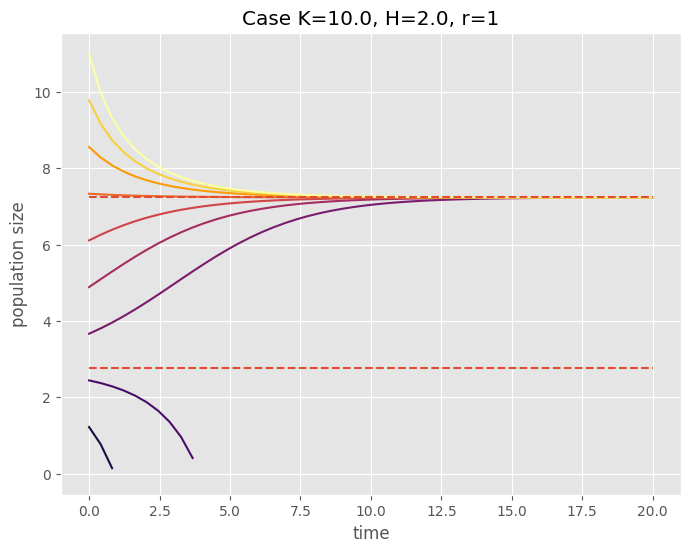

In [19]:
# Let's plot the result    
f,ax = plt.subplots(1,1,figsize=(8,6))
plot_population_size(ax,tmax,r,K,H)

**Assignment #1**

For the model above, evaluate and show the effect of the follwoing three different values of $H$: $0, 1.25, 2.5$. 
    
You can use subplots to show the results for these three values of $H$ (in each subplot, show the solutions for one value of $H$, and for each of the above ten values of N(0)). An alternative way is to plot the result sin three separate plots, although the former will look nicer.     

You can start by defining the list of values of H that you'll work with, for example using:
Hlist=[0.,1.25,2.5]


For subplots, you can use the following line to help you. 
 
f,axes = plt.subplots(1,3,figsize=(15,6))

Explain the effect of increasing $H$ on the dynamics of fish population size (one-two sentences).

In [20]:
#Your code here for the solution of the model with three values of H

In [21]:
#Your code for plotting the results

**Assignment #2**

Now set $H=1$ and evaluate and show the effect of the following three different values of the growth rate $r$: $0.8, 1, 1.2$. 
    
Use subplots to show the results for these three values of $r$ (in each subplot, show the solutions for one value of $r$, and for each of the above ten values of N(0)). Again, you are free to use separate plots, instead.     

Explain the effect of increasing $r$ on the dynamics of fish population size (one-two sentences). 

In [22]:
#Your code here for the solution of the model with three different values of r


In [23]:
#Your code here for plotting the results

## 2. SIR epidemic model

There are many model variants of the dynamics of disease spreading through a population, the process that may or may not result in epidemic. Here we will work with a variant of such models, **SIR model**, also known as a **compartment model**. This example is sourced from the [Scipy website](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/) where you can find more details. For more on these models and their variations, see [Compartmental models in epidimiology, Wikipedia](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology).

In the SIR model, at any given time point $t$, an individual in a population of interest is either *susceptibe* to the disease in question, or *infected*, or *recovered*. Susceptibles (S), Infected (I) and Recovered (R) are the three compartments dividing the population in question; the number of individuals in S, I, and R compartments at time $t$ is denoted by $S(t)$, $I(t)$, and $R(t)$, respectively. The total number of individuals $N=S(t)+I(t)+R(t)$ is assumed to be constant (see below).

In the simplest version of the SIR model, the flow between the compartments is as follows: $$S\rightarrow I\rightarrow R\,.$$

The R compartment is a bit special, because the individuals it contains could be either trully recovered from the disease (after they have been infected), or they could have died after being infected. These two possibilities are not distinguished in the model, so the word 'recovered' is somewhat unfortunate (sometimes 'removed' is used an alternative). Nevertheless, it is important that individuals in the R compartment are assumed to be unable to transfer the disease further, and that they cannot be infected ever again by the disease (either due to developing an immunnity and/or due to death).

The disease is assumed to spread via some form of *effective* contact between Infected and Susceptibles. The population is assumed to be well-mixed and that it lacks any spatial structure, i.e., all individuals are equally likely to come into contact with any other individual in the population. This means that the probability that a contact is made with an individual from the S compartment at time $t$ is $S(t)/N$. Denoting the *effective contact probability* per unit time by $\beta$, the expected number of new infected individuals per unit time will be $\beta I(t) S(t)/N$; this is also the expected number of individuals 'leaving' the S compartment per unit time (see below the SIR-model equation for $\frac{dS}{dt}$ and the first term in the equation for $\frac{dI}{dt}$).

The model further assumes that infected individuals recover with the probability $\gamma$ per unit time ($\gamma$ is also known as the *recovery rate*). In other words, the expected recovery time of an infected individual is $1/\gamma$, during which time it can infect other (susceptible) individuals in the population. This means that the expected number of individuals 'leaving' the I compartment per unit time is $\gamma I(t)$, which is also the expected number of individuals 'entering' the R compartment (see below the second term in the SIR-model equation for $\frac{dI}{dt}$, and the equation for $\frac{dR}{dt})$. 

Finally, the model neglects new births or deaths in the population, except that deaths are implicitly included in the R compartment. These model simplifications are reasonable when the duration of the epidemic is short in comparison to the average lifetime of individuals in the absence of disease and/or the average time to reach maturity in disease free population. This is usually valid (in most cases, one unit of time corresponds to one day).

Based on these assumptions, the SIR model can be described by the following system of differential equations:

\begin{equation}
\frac{dS}{dt} = -\frac{\beta I S}{N}
\end{equation}

\begin{equation}
\frac{dI}{dt} = \frac{\beta I S}{N} - \gamma I
\end{equation}

\begin{equation}
\frac{dR}{dt} = \gamma I
\end{equation}


Note that $\frac{dN}{dt}=\frac{dS}{dt}+\frac{dI}{dt}+\frac{dR}{dt}=0$, meaning that $N$ is kept constant in the model (which makes sense, as deaths are only implicitly accounted for by the R compartment).

A vitally important number in the model is the ratio: $R_0 = \beta/\gamma$, i.e., the expected number of new infections generated by a single infected individual while this individual is infected. It turns out (see the  equation for $\frac{dI}{dt}$) that when $R_0 \gt 1$, the disease spreads through the population (resulting in epidemic), whereas when $R_0 \lt 1$, the disease quickly dies out.

Here, we will numerically solve the SIR epidemic model:

1. In pure Python using for loops to integrate in time.
1. Using Scipy's odeint package. 

### 2.1 Solving the SIR model using pure Python

We will first solve the SIR model by discretising the above euqations. The solution can then be obtained using for loops in pure Python.

In the following example, we will assume that one unit of time is one day.

In [24]:
import numpy as np
import matplotlib.pyplot as plt


#state the initial conditions, and parameters
#assume that N=1000; the initial number of recovered is 0, the initial number of infected is 1, and all others are suceptibles.
N = 1000
Rec0 = 0
Inf0 = 1
Sus0 = N - Inf0 - Rec0
print('Sus0 = ',Sus0)

Sus0 =  999


In [25]:
#values for the parameters beta and gamma
#assume beta=0.2 and gamma=0.1
beta = 0.2
gamma = 0.1

#compute the parameter R_0
R0 = beta/gamma
print('R0 = ',R0)

R0 =  2.0


In [26]:
#let's use a discretized verison of the SIR model, and implement for loop (say over 150 time steps) to solve the model
Sus = [Sus0]
Rec = [Rec0]
Inf = [Inf0]
for t in range(150):
    delta_S = -beta * Inf[-1] * Sus[-1] / N
    Sus.append(Sus[-1]+delta_S)
    
    delta_I = beta * Inf[-1] * Sus[-1] / N - gamma * Inf[-1]
    Inf.append(Inf[-1] + delta_I)
    
    delta_R = gamma * Inf[-1]
    Rec.append(Rec[-1] + delta_R)
    #print(delta_S, delta_I, delta_R)

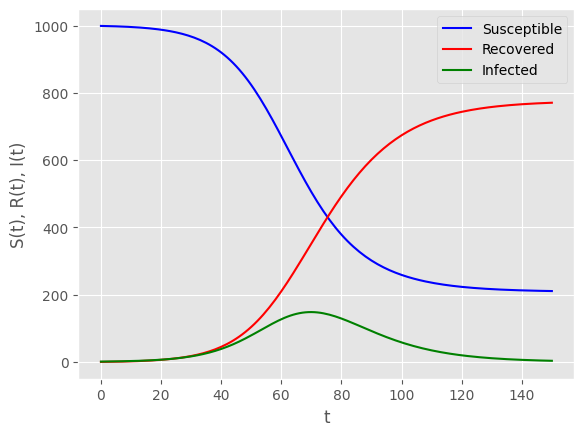

In [27]:
Sus = np.array(Sus)
Rec = np.array(Rec)
Inf = np.array(Inf)

plt.plot(np.arange(151), Sus, color="b", label="Susceptible")
plt.plot(np.arange(151), Rec, color="r", label="Recovered")
plt.plot(np.arange(151), Inf, color="g", label="Infected")
plt.xlabel('t')
plt.ylabel('S(t), R(t), I(t)')
plt.legend()
plt.show()

Did the disease die out by the end of the timespan we looked at here? Check the number of individuals in each compartment at the last time point.

In [28]:

print(Inf[-1])
print(Sus[-1])
print(Rec[-1])
print(Inf[-1]+Sus[-1]+Rec[-1])

3.3748907041493883
210.71085746888684
770.6230574625212
984.7088056355574


Note that the total number of individuals is not precisely 1000, although we expect N to be constant over time. This is due to a numerical error.

### 2.2 Solving the SIR model using SciPy

Use the same parameters as in the example above and solve the model using odeint in SciPy.

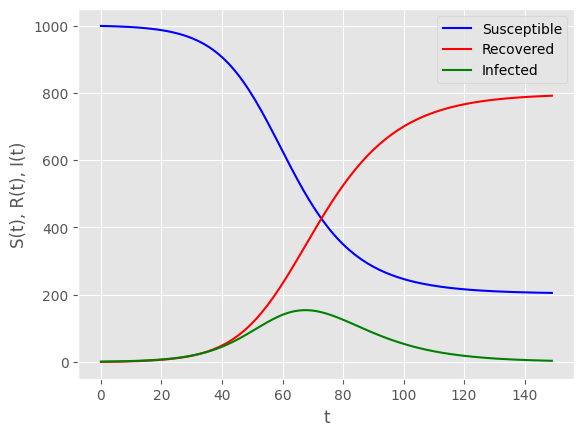

In [29]:
#solution

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#parameters as before
N = 1000
Rec0 = 0
Inf0 = 1
Sus0 = N - Inf0
beta = 0.2
gamma = 0.1
R0 = beta/gamma

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = Sus0, Inf0, Rec0
# Integrate the SIR equations over the time grid, t.
#number of time steps: time_max
#If needed, this can be increased
time_max=150
t = np.arange(time_max)
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

S=np.array(S)
I=np.array(I)
R=np.array(R)

plt.plot(np.arange(time_max), S, color="b", label="Susceptible")
plt.plot(np.arange(time_max), R, color="r", label="Recovered")
plt.plot(np.arange(time_max), I, color="g", label="Infected")
plt.xlabel('t')
plt.ylabel('S(t), R(t), I(t)')
plt.legend()
plt.show()

Check the values of I, S and R at the end of the predefined time span, and evaluate the corresponding N. 

In [30]:
print(I[-1])
print(S[-1])
print(R[-1])
print(I[-1]+S[-1]+R[-1])

3.3531516257732834
205.15683980241366
791.4900085718126
999.9999999999995


We see that the disease didn't quite die out $t=150$ days after the start of the infection. 

We also see that the total number of individuals is very, very close to 1000, which is what we expect.

**Assignment #3**

1. For this model scenario, estimate the number of days after the start of the infection when the peak of infection occurs, as well as the number of infected at the peak. 



In [31]:
#Your code here



2. Estimate the time needed for the disease to be fully eliminated from the population. You need to come up with a reasonable condition for treating the disease as being fully eliminated. Motivate your reasoning for the chosen condition. Hint: You may need to increase the time interval over which the solution is to be found.

In [32]:
#Your code here


#Motivate in a comment form

3. Compute the total number of inidividuals that were infected until the disease died out. Explain your reasoning.

In [33]:
#Your code here

#Explain in a comment form

**Assignment #4**

1. Solve the SIR model assuming that all parameters but $\beta$ (see next) have the same values as in the previous example. For the effective contact rate $\beta$ assume that, from the start of the infection and until 15 days prior to the expected peak of the infection, it has the same value as in the previous example; but at that point in time, $\beta$ is reduced by 40% and kept constant thereon, owing to specific measures designed to reduce contacts between inidividuals. Plot the results of the model in this case, together with the results obtained in the case we studied above (i.e., with constant $\beta$). Discuss (one-two sentences) differencies/similarities.



In [34]:
#Your code here

#Discuss in a comment form

2. When does the peak of infection occur in this case and how many individuals are infected at that point in time? Compare to the corresponding result obtained in **Assignement #3**. Explain and briefly discuss (one-two sentences).

In [35]:
#Your code here

#Discuss in a comment form

3. Estimate the time needed for the disease to be fully eliminated from the population. Compare to the corresponding result obtained in **Assignement #3**. Explain and briefly discuss (one-two sentences).

In [36]:
#Your code here

#Discuss in a comment form

4. Compute the total number of inidividuals that were infected until the disease died out. Compare to the corresponding result obtained in **Assignement #3**. Explain and briefly discuss (one-two sentences).

In [38]:
#Your code here

#Discuss in a comment form

**Bonus Assignment**

Now assume that, instead of $\beta$, it is $\gamma$ that is modified at exactly the same time point as in **Assignment #4**: the new $\gamma$ is by 2/3 larger than $\gamma$ at the start of infection (but $\beta$ is now kept constant). Solve this model and compare to the results you obtained under the model with all constant parameters, and also under the model where $\beta$ was modified. Discuss advantages/disadvantages (if any) of increasing $\gamma$ (one-two sentences).

In [39]:
#Your code here

#Discuss in a comment form